In [3]:
!pip install requests
!pip install numpy
!pip install pandas
!pip install nltk
!pip install matplotlib
!pip install rake-nltk


[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import requests
import json
import numpy as np
import pandas as pd
import nltk 
import matplotlib
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import re
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from rake_nltk import Rake 

C:\Users\prath\AppData\Local\Temp\ipykernel_12612\1456167432.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
news_articles_df = pd.DataFrame(pd.read_excel("Articles.xlsx"))

In [6]:
def map_to_month(date):
    if f"{date}" == "20201101":
        return 0
    elif f"{date}" == "20201201":
        return 1
    elif f"{date}" == "20210101":
        return 2
    elif f"{date}" == "20210201":
        return 3
    elif f"{date}" == "20210301":
        return 4
    elif f"{date}" == "20210401":
        return 5
    elif f"{date}" == "20210501":
        return 6
    elif f"{date}" == "20210601":
        return 7
    elif f"{date}" == "20210701":
        return 8
    elif f"{date}" == "20210801":
        return 9
    elif f"{date}" == "20210901":
        return 10
    elif f"{date}" == "20211001":
        return 11
    elif f"{date}" == "20211101":
        return 12
    else:
        return None

news_articles_df['Month'] = news_articles_df['Date'].apply(map_to_month)

In [7]:
news_articles_df['Publication Date'] = news_articles_df['Publication Date'].dt.date

In [8]:
mode_publication_date_by_month = news_articles_df.groupby('Month')['Publication Date'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NaT)
mode_publication_date_by_month

Month
0     2020-11-30
1     2020-12-01
2     2021-01-26
3     2021-02-04
4     2021-03-05
5     2021-04-13
6     2021-05-23
7     2021-06-26
8     2021-07-22
9     2021-08-03
10    2021-09-27
11    2021-10-15
12    2021-11-19
Name: Publication Date, dtype: object

In [9]:
for index, row in news_articles_df.iterrows():
    if pd.isnull(row['Publication Date']):
        mode_date = mode_publication_date_by_month.get(row['Month'])
        news_articles_df.at[index, 'Publication Date'] = mode_date

In [10]:
news_articles_df.isnull().sum() 

Date                  0
Title                 0
Author              218
Publication Date      0
Article Text          0
Link                  0
Source URL            0
Month                 0
dtype: int64

In [11]:
news_articles_df['combined_text'] = news_articles_df['Title'].map(str) +" "+ news_articles_df['Article Text'].map(str) 

In [12]:
news_articles_df

,Date,Title,Author,Publication Date,Article Text,Link,Source URL,Month,combined_text
0,20201101,Punjab farm protests: Railways incur loss to t...,Business Standard,2020-11-04,The loss suffered by the Railways due to the a...,https://www.business-standard.com/article/indi...,https://www.business-standard.com,0,Punjab farm protests: Railways incur loss to t...
1,20201101,Look beyond Punjab and Haryana,"Cdata, Var Template_Content, Sso_Login_Box, Xw...",2020-11-04,Written by Arindam Gupta\n\nThree Congress-rul...,https://indianexpress.com/article/opinion/farm...,https://indianexpress.com,0,Look beyond Punjab and Haryana Written by Arin...
2,20201101,"Explained: The Railways network in Punjab, and...","Avishek G Dastidar, Cdata, Var Template_Conten...",2020-11-10,The ongoing protests by farmers have brought a...,https://indianexpress.com/article/explained/th...,https://indianexpress.com,0,"Explained: The Railways network in Punjab, and..."
3,20201101,"‘Farm protests eating into economy, will harm ...","Raakhi Jagga, Cdata, Var Template_Content, Sso...",2020-11-12,Disgruntled notes of protest have finally star...,https://indianexpress.com/article/india/farm-p...,https://indianexpress.com,0,"‘Farm protests eating into economy, will harm ..."
4,20201101,‘Modi’s Rockefeller’: Gautam Adani and the con...,"Stephanie Findlay, Hudson Lockett",2020-11-13,Print this page\n\nWhen the Indian government ...,https://www.ft.com/content/474706d6-1243-4f1e-...,https://www.ft.com,0,‘Modi’s Rockefeller’: Gautam Adani and the con...
...,...,...,...,...,...,...,...,...,...
580,20211101,Modi’s U-turn on farming laws reflects anxiety...,NaN,2021-11-19,Try unlimited access Only ₹100 for 4 weeks\n\n...,https://www.ft.com/content/bd3d4c85-bf96-4e7a-...,https://www.ft.com,12,Modi’s U-turn on farming laws reflects anxiety...
581,20211101,Thousands Gather For Farmers Rally In Lucknow ...,NaN,2021-11-19,Farmers Protest: Thousands gathered for the la...,https://www.ndtv.com/india-news/thousands-gath...,https://www.ndtv.com,12,Thousands Gather For Farmers Rally In Lucknow ...
582,20211101,Farmers Protest Highlights: Farmers Gather At ...,NaN,2021-11-19,"Farmers Protest: Protest began with the ""Dilli...",https://www.ndtv.com/india-news/farmers-protes...,https://www.ndtv.com,12,Farmers Protest Highlights: Farmers Gather At ...
583,20211101,"""Centre Has Time Until November 26, Else..."": ...",NaN,2021-11-19,Rakesh Tikait's warning came as the as the far...,https://www.ndtv.com/india-news/farmer-leader-...,https://www.ndtv.com,12,"""Centre Has Time Until November 26, Else..."": ..."


In [13]:
def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)
    
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = text.replace('(ap)', '')
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = _removeNonAscii(text)
    text = text.strip()
    return text
    
def remove_stopwords(word_tokens):
    filtered_sentence = [] 
    stop_words = stopwords.words('english')
    specific_words_list = ['char'] 
    stop_words.extend(specific_words_list )
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    return filtered_sentence
    
def lemmatize(x):
    lemmatizer = WordNetLemmatizer()
    return' '.join([lemmatizer.lemmatize(word) for word in x])

tokenizer = RegexpTokenizer(r'\w+')
def tokenize(x): 
    return tokenizer.tokenize(x)

In [14]:
news_articles_df['combined_text'] = news_articles_df['combined_text'].map(clean_text)
news_articles_df['tokens'] = news_articles_df['combined_text'].map(tokenize)
news_articles_df['tokens'] = news_articles_df['tokens'].map(remove_stopwords)
news_articles_df['lems'] =news_articles_df['tokens'].map(lemmatize)

In [15]:
news_articles_df.head()

,Date,Title,Author,Publication Date,Article Text,Link,Source URL,Month,combined_text,tokens,lems
0,20201101,Punjab farm protests: Railways incur loss to t...,Business Standard,2020-11-04,The loss suffered by the Railways due to the a...,https://www.business-standard.com/article/indi...,https://www.business-standard.com,0,punjab farm protests railways incur loss to th...,"[punjab, farm, protests, railways, incur, loss...",punjab farm protest railway incur loss tune r ...
1,20201101,Look beyond Punjab and Haryana,"Cdata, Var Template_Content, Sso_Login_Box, Xw...",2020-11-04,Written by Arindam Gupta\n\nThree Congress-rul...,https://indianexpress.com/article/opinion/farm...,https://indianexpress.com,0,look beyond punjab and haryana written by arin...,"[look, beyond, punjab, haryana, written, arind...",look beyond punjab haryana written arindam gup...
2,20201101,"Explained: The Railways network in Punjab, and...","Avishek G Dastidar, Cdata, Var Template_Conten...",2020-11-10,The ongoing protests by farmers have brought a...,https://indianexpress.com/article/explained/th...,https://indianexpress.com,0,explained the railways network in punjab and h...,"[explained, railways, network, punjab, impacte...",explained railway network punjab impacted ongo...
3,20201101,"‘Farm protests eating into economy, will harm ...","Raakhi Jagga, Cdata, Var Template_Content, Sso...",2020-11-12,Disgruntled notes of protest have finally star...,https://indianexpress.com/article/india/farm-p...,https://indianexpress.com,0,farm protests eating into economy will harm pu...,"[farm, protests, eating, economy, harm, punjab...",farm protest eating economy harm punjab centre...
4,20201101,‘Modi’s Rockefeller’: Gautam Adani and the con...,"Stephanie Findlay, Hudson Lockett",2020-11-13,Print this page\n\nWhen the Indian government ...,https://www.ft.com/content/474706d6-1243-4f1e-...,https://www.ft.com,0,modi s rockefeller gautam adani and the concen...,"[modi, rockefeller, gautam, adani, concentrati...",modi rockefeller gautam adani concentration po...


In [16]:
news_articles_df['keywords'] = ""
for index, row in news_articles_df.iterrows():
    comb_text = row['combined_text']
    r = Rake()
    r.extract_keywords_from_text(comb_text)
    key_words_dict = r.get_word_degrees()
    news_articles_df.at[index, 'keywords'] = list(key_words_dict.keys())

In [17]:
news_articles_df.head()

,Date,Title,Author,Publication Date,Article Text,Link,Source URL,Month,combined_text,tokens,lems,keywords
0,20201101,Punjab farm protests: Railways incur loss to t...,Business Standard,2020-11-04,The loss suffered by the Railways due to the a...,https://www.business-standard.com/article/indi...,https://www.business-standard.com,0,punjab farm protests railways incur loss to th...,"[punjab, farm, protests, railways, incur, loss...",punjab farm protest railway incur loss tune r ...,"[punjab, farm, protests, railways, incur, loss..."
1,20201101,Look beyond Punjab and Haryana,"Cdata, Var Template_Content, Sso_Login_Box, Xw...",2020-11-04,Written by Arindam Gupta\n\nThree Congress-rul...,https://indianexpress.com/article/opinion/farm...,https://indianexpress.com,0,look beyond punjab and haryana written by arin...,"[look, beyond, punjab, haryana, written, arind...",look beyond punjab haryana written arindam gup...,"[look, beyond, punjab, haryana, written, arind..."
2,20201101,"Explained: The Railways network in Punjab, and...","Avishek G Dastidar, Cdata, Var Template_Conten...",2020-11-10,The ongoing protests by farmers have brought a...,https://indianexpress.com/article/explained/th...,https://indianexpress.com,0,explained the railways network in punjab and h...,"[explained, railways, network, punjab, impacte...",explained railway network punjab impacted ongo...,"[explained, railways, network, punjab, impacte..."
3,20201101,"‘Farm protests eating into economy, will harm ...","Raakhi Jagga, Cdata, Var Template_Content, Sso...",2020-11-12,Disgruntled notes of protest have finally star...,https://indianexpress.com/article/india/farm-p...,https://indianexpress.com,0,farm protests eating into economy will harm pu...,"[farm, protests, eating, economy, harm, punjab...",farm protest eating economy harm punjab centre...,"[farm, protests, eating, economy, harm, punjab..."
4,20201101,‘Modi’s Rockefeller’: Gautam Adani and the con...,"Stephanie Findlay, Hudson Lockett",2020-11-13,Print this page\n\nWhen the Indian government ...,https://www.ft.com/content/474706d6-1243-4f1e-...,https://www.ft.com,0,modi s rockefeller gautam adani and the concen...,"[modi, rockefeller, gautam, adani, concentrati...",modi rockefeller gautam adani concentration po...,"[modi, rockefeller, gautam, adani, concentrati..."


In [18]:
news_articles_df.loc[45, 'keywords']

['farmers',
 'protest',
 'mechanic',
 'came',
 'repair',
 'tractor',
 'tyres',
 'free',
 'dies',
 'car',
 'goes',
 'flames',
 'janak',
 'raj',
 'aggarwal',
 'cycle',
 'shop',
 'dhanaula',
 'village',
 'punjab',
 'barnala',
 'district',
 'used',
 'punctured',
 'almost',
 'vehicles',
 'scooter',
 'even',
 'hence',
 'alongwith',
 'three',
 'mechanics',
 'area',
 'decided',
 'provide',
 'services',
 'cost',
 'participating',
 'delhi',
 'chalo',
 'reached',
 'tikri',
 'border',
 'offered',
 'good',
 'samaritan',
 'saturday',
 'evening',
 'start',
 'repairing',
 'damaged',
 'tractors',
 'come',
 'helper',
 'slept',
 'around',
 'sunday',
 'caught',
 'fire',
 'tried',
 'best',
 'save',
 'said',
 'jaswinder',
 'singh',
 'longowal',
 'state',
 'committee',
 'member',
 'bku',
 'ugrahan',
 'speaking',
 'indian',
 'express',
 'harinder',
 'kaur',
 'bindu',
 'women',
 'leader',
 'pm',
 'dinner',
 'serviced',
 'one',
 'got',
 'tired',
 'age',
 'went',
 'sleep',
 'rest',
 'still',
 'second',
 'saw',
 

In [19]:
news_articles_df['keywords'] = news_articles_df['keywords'].map(remove_stopwords)
news_articles_df['lems'] =news_articles_df['keywords'].map(lemmatize)

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
nltk.download('vader_lexicon')
sia = SIA()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\prath\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [21]:
results = []
for line in news_articles_df['lems'] :
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

In [22]:
headlines_polarity = pd.DataFrame.from_records(results)
headlines_polarity.head()

,neg,neu,pos,compound,headline
0,0.180,0.740,0.080,-0.9571,punjab farm protest railway incur loss tune r ...
1,0.109,0.794,0.097,-0.7003,look beyond punjab haryana written arindam gup...
2,0.039,0.901,0.060,0.6502,explained railway network punjab impacted ongo...
3,0.141,0.732,0.127,-0.5574,farm protest eating economy harm punjab centre...
4,0.128,0.733,0.139,0.6936,modi rockefeller gautam adani concentration po...


In [23]:
# categorize news as positive or negative based on the compound score obtained
headlines_polarity['label'] = 0
# I have considered the news as positive if the compound score is greater than 0.2 hence the label 1
headlines_polarity.loc[headlines_polarity['compound'] > 0.2, 'label'] = 1
# if the compound score is below 0.2 then it is considered negative 
headlines_polarity.loc[headlines_polarity['compound'] < -0.2, 'label'] = -1
# word count of news headlines is calculated
headlines_polarity['word_count'] = headlines_polarity['headline'].apply(lambda x: len(str(x).split()))

In [24]:
headlines_polarity['label'].value_counts()

label
 1    280
-1    274
 0     31
Name: count, dtype: int64

In [25]:
temp = []
for line in news_articles_df['Publication Date'] :
    temp.append(line)
headlines_polarity['Publication Date'] =temp

In [26]:
temp2 = []
for line in news_articles_df['Month'] :
    temp2.append(line)
headlines_polarity['Month'] =temp2

In [27]:
headlines_polarity.head()

,neg,neu,pos,compound,headline,label,word_count,Publication Date,Month
0,0.180,0.740,0.080,-0.9571,punjab farm protest railway incur loss tune r ...,-1,184,2020-11-04,0
1,0.109,0.794,0.097,-0.7003,look beyond punjab haryana written arindam gup...,-1,361,2020-11-04,0
2,0.039,0.901,0.060,0.6502,explained railway network punjab impacted ongo...,1,246,2020-11-10,0
3,0.141,0.732,0.127,-0.5574,farm protest eating economy harm punjab centre...,-1,269,2020-11-12,0
4,0.128,0.733,0.139,0.6936,modi rockefeller gautam adani concentration po...,1,890,2020-11-13,0


In [28]:
avg_sentiments = headlines_polarity.groupby('Month').agg({
    'neg': 'mean',
    'neu': 'mean',
    'pos': 'mean',
    'compound': 'mean',
    'label': 'mean'
}).reset_index()

In [29]:
avg_sentiments

,Month,neg,neu,pos,compound,label
0,0,0.134281,0.744561,0.121105,-0.207079,-0.315789
1,1,0.119270,0.730970,0.149770,0.359047,0.380000
2,2,0.150474,0.728546,0.120990,-0.193651,-0.226804
3,3,0.124062,0.722278,0.153691,0.252564,0.288660
4,4,0.129419,0.743093,0.127605,0.066005,0.116279
5,5,0.090300,0.792000,0.117600,0.284650,0.200000
6,6,0.136100,0.751100,0.112800,-0.271540,-0.200000
7,7,0.124833,0.732250,0.142917,0.088467,0.000000
8,8,0.137267,0.764533,0.098000,-0.243073,-0.266667
9,9,0.165200,0.709200,0.125500,-0.380200,-0.400000


In [30]:
import matplotlib.pyplot as plt

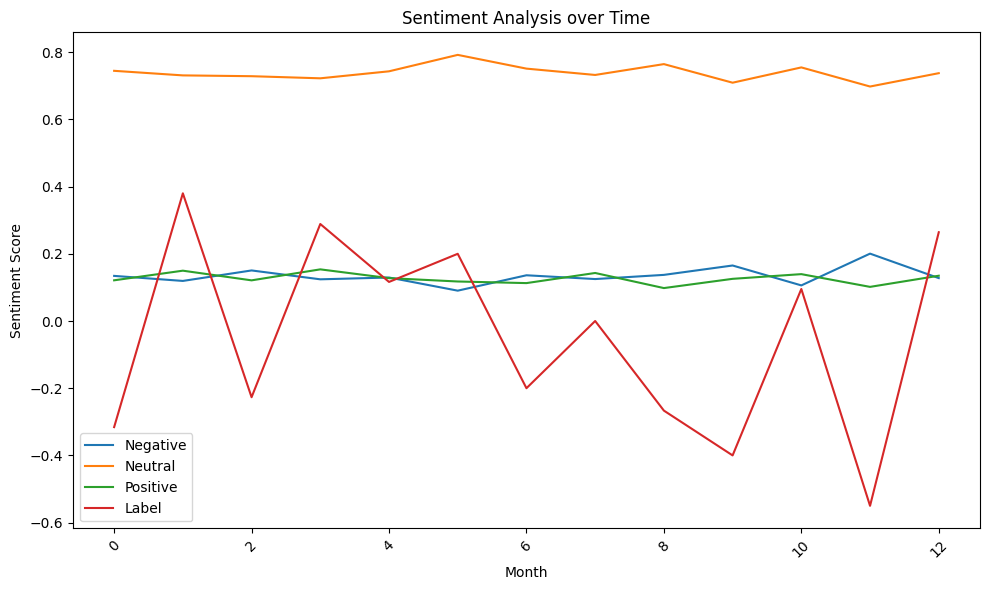

In [31]:
plt.figure(figsize=(10, 6))

plt.plot(avg_sentiments['Month'], avg_sentiments['neg'], label='Negative')
plt.plot(avg_sentiments['Month'], avg_sentiments['neu'], label='Neutral')
plt.plot(avg_sentiments['Month'], avg_sentiments['pos'], label='Positive')
#plt.plot(avg_sentiments['Month'], avg_sentiments['compound'], label='Compound')
plt.plot(avg_sentiments['Month'], avg_sentiments['label'], label='Label')

plt.xlabel('Month')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [32]:
headlines_polarity['Month'].value_counts()

Month
1     100
2      97
3      97
11     60
0      57
12     53
4      43
10     21
8      15
7      12
5      10
6      10
9      10
Name: count, dtype: int64

In [33]:
month_counts = headlines_polarity['Month'].value_counts()

normalized_counts = (month_counts - month_counts.min()) / (month_counts.max() - month_counts.min())

sorted_normalized_counts = normalized_counts.sort_index()

sorted_normalized_counts

Month
0     0.522222
1     1.000000
2     0.966667
3     0.966667
4     0.366667
5     0.000000
6     0.000000
7     0.022222
8     0.055556
9     0.000000
10    0.122222
11    0.555556
12    0.477778
Name: count, dtype: float64

In [34]:
normalized_avg_sentiments = avg_sentiments.copy()
normalized_avg_sentiments.iloc[:, 1:] = normalized_avg_sentiments.iloc[:, 1:].multiply(sorted_normalized_counts, axis=0)

normalized_avg_sentiments

,Month,neg,neu,pos,compound,label
0,0,0.070124,0.388827,0.063244,-0.108141,-0.164912
1,1,0.119270,0.730970,0.149770,0.359047,0.380000
2,2,0.145458,0.704262,0.116957,-0.187195,-0.219244
3,3,0.119926,0.698202,0.148568,0.244145,0.279038
4,4,0.047453,0.272467,0.046788,0.024202,0.042636
5,5,0.000000,0.000000,0.000000,0.000000,0.000000
6,6,0.000000,0.000000,0.000000,-0.000000,-0.000000
7,7,0.002774,0.016272,0.003176,0.001966,0.000000
8,8,0.007626,0.042474,0.005444,-0.013504,-0.014815
9,9,0.000000,0.000000,0.000000,-0.000000,-0.000000


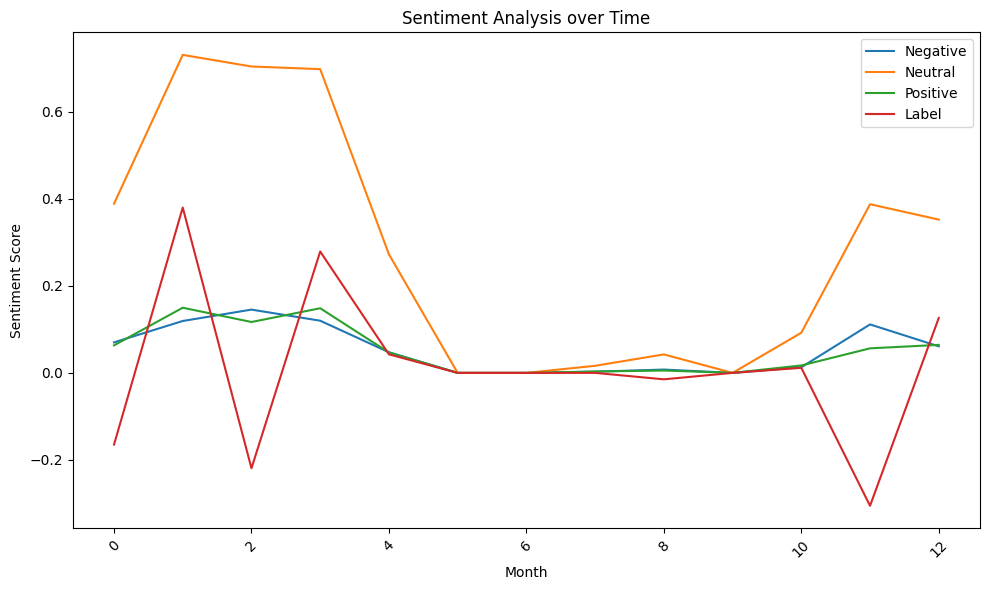

In [35]:
plt.figure(figsize=(10, 6))

plt.plot(normalized_avg_sentiments['Month'], normalized_avg_sentiments['neg'], label='Negative')
plt.plot(normalized_avg_sentiments['Month'], normalized_avg_sentiments['neu'], label='Neutral')
plt.plot(normalized_avg_sentiments['Month'], normalized_avg_sentiments['pos'], label='Positive')
#plt.plot(normalized_avg_sentiments['Month'], normalized_avg_sentiments['compound'], label='Compound')
plt.plot(normalized_avg_sentiments['Month'], normalized_avg_sentiments['label'], label='Label')

plt.xlabel('Month')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Twitter data

In [36]:
tweet=pd.read_csv('tweets.csv')
tweet.head()

,tweetUrl,date,renderedContent,tweetId,userId,replyCount,retweetCount,likeCount,quoteCount,source,media,retweetedTweet,quotedTweet,mentionedUsers
0,https://twitter.com/ShashiRajbhar6/status/1376...,2021-03-30 03:33:46+00:00,Support 👇\n\n#FarmersProtest,1.376739e+18,1.015970e+18,0,0,0,0,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN
1,https://twitter.com/kaursuk06272818/status/137...,2021-03-30 03:33:23+00:00,Supporting farmers means supporting our countr...,1.376739e+18,1.332937e+18,0,0,0,0,"<a href=""http://twitter.com/download/android"" ...",[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,NaN,NaN
2,https://twitter.com/kaursuk06272818/status/137...,2021-03-30 03:31:00+00:00,Support farmers if you are related to food #St...,1.376739e+18,1.332937e+18,0,0,0,0,"<a href=""http://twitter.com/download/android"" ...",[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,NaN,NaN
3,https://twitter.com/SukhdevSingh_/status/13767...,2021-03-30 03:30:45+00:00,#StopHateAgainstFarmers support #FarmersProtes...,1.376739e+18,1.308357e+18,0,1,3,0,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN
4,https://twitter.com/Davidmu66668113/status/137...,2021-03-30 03:30:30+00:00,"You hate farmers I hate you, \nif you love the...",1.376739e+18,1.357312e+18,0,0,1,0,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN


In [37]:
user=pd.read_csv('users.csv')
user.head()

,username,displayname,userId,rawDescription,descriptionUrls,verified,created,followersCount,friendsCount,statusesCount,favouritesCount,listedCount,mediaCount,location,protected,linkUrl,profileImageUrl,profileBannerUrl,profileUrl
0,ShashiRajbhar6,Shashi Rajbhar,1.020000e+18,Satya presan 🤔ho Sakta but prajit💪 nhi\njhuth ...,[],False,2018-07-08T14:44:03+00:00,1788,1576,14396,26071,1,254,"Azm Uttar Pradesh, India",False,NaN,https://pbs.twimg.com/profile_images/135433129...,https://pbs.twimg.com/profile_banners/10159697...,https://twitter.com/ShashiRajbhar6
1,kaursuk06272818,KAUR SUKH🌾ਕੌਰ ਸੁਖ,1.330000e+18,ਜਿਓਣਾ ਕੀ ਸਰੀਰਾਂ ਦਾ ਜੇਕਰ ਹੋਣ ਜ਼ਮੀਰਾਂ ਮਰੀਆਂ 🌼,[],False,2020-11-29T06:40:06+00:00,51,68,1338,3676,0,607,NaN,False,NaN,https://pbs.twimg.com/profile_images/133295149...,https://pbs.twimg.com/profile_banners/13329372...,https://twitter.com/kaursuk06272818
2,SukhdevSingh_,Sukhdev Singh,1.310000e+18,Just a part of my society . Social and Politic...,[],False,2020-09-22T10:45:27+00:00,2595,3314,3281,3533,0,519,"Punjab, India",False,NaN,https://pbs.twimg.com/profile_images/130835702...,https://pbs.twimg.com/profile_banners/13083566...,https://twitter.com/SukhdevSingh_
3,Davidmu66668113,tera jija 🤨🚩🇺🇸,1.360000e+18,dream boy 🌪🌍🔥💯,[],False,2021-02-04T12:55:36+00:00,18,286,347,520,0,3,NaN,False,NaN,https://pbs.twimg.com/profile_images/137600703...,https://pbs.twimg.com/profile_banners/13573117...,https://twitter.com/Davidmu66668113
4,Abhimanyu_1987,Abhimanyu 🌏 🇮🇳,2.918611e+09,Seeker...,[],False,2014-12-04T13:29:54+00:00,173,41,8954,16364,19,112,"Jaipur,Rajasthan,India",False,NaN,https://pbs.twimg.com/profile_images/125684524...,https://pbs.twimg.com/profile_banners/29186109...,https://twitter.com/Abhimanyu_1987


In [38]:
final_data = pd.merge(tweet, user, how='inner', on='userId')

In [39]:
final_data= final_data.drop_duplicates(subset=['renderedContent'])
final_data.head()

,tweetUrl,date,renderedContent,tweetId,userId,replyCount,retweetCount,likeCount,quoteCount,source,...,statusesCount,favouritesCount,listedCount,mediaCount,location,protected,linkUrl,profileImageUrl,profileBannerUrl,profileUrl
0,https://twitter.com/SukhdevSingh_/status/13767...,2021-03-30 03:30:45+00:00,#StopHateAgainstFarmers support #FarmersProtes...,1.376739e+18,1.308357e+18,0,1,3,0,"<a href=""http://twitter.com/download/android"" ...",...,5573,9222,4,628,"Punjab, India",False,NaN,https://pbs.twimg.com/profile_images/139755214...,https://pbs.twimg.com/profile_banners/13083566...,https://twitter.com/SukhdevSingh_
1,https://twitter.com/Abhimanyu_1987/status/1376...,2021-03-30 03:29:56+00:00,They can't be farmers. Looks like Gundas are h...,1.376738e+18,2.918611e+09,0,0,0,0,"<a href=""http://twitter.com/download/android"" ...",...,8954,16364,19,112,"Jaipur,Rajasthan,India",False,NaN,https://pbs.twimg.com/profile_images/125684524...,https://pbs.twimg.com/profile_banners/29186109...,https://twitter.com/Abhimanyu_1987
3,https://twitter.com/singhwhotweets/status/1376...,2021-03-30 03:28:50+00:00,Lets not forget that our Farmers are STILL out...,1.376738e+18,1.237420e+18,0,2,3,0,"<a href=""http://twitter.com/download/android"" ...",...,31956,32566,6,3862,"Manhattan, NY",False,NaN,https://pbs.twimg.com/profile_images/140114221...,https://pbs.twimg.com/profile_banners/12374204...,https://twitter.com/singhwhotweets
4,https://twitter.com/DigitalKisanBot/status/137...,2021-03-30 03:28:09+00:00,"Neutrality helps the oppressor, never the vict...",1.376738e+18,1.309303e+18,0,0,0,0,NaN,...,38088,2550,3,156,"Atlanta, GA",False,NaN,https://pbs.twimg.com/profile_images/135422427...,https://pbs.twimg.com/profile_banners/13093029...,https://twitter.com/DigitalKisanBot
5,https://twitter.com/rajriarhughes/status/13767...,2021-03-30 03:28:04+00:00,Why You Should Visit the F.A.R.M.E.R. at Tikri...,1.376738e+18,8.583830e+17,0,0,0,0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",...,36040,43680,2,5,NaN,False,NaN,https://pbs.twimg.com/profile_images/145749574...,https://pbs.twimg.com/profile_banners/85838303...,https://twitter.com/sjbwaj


In [40]:
final_data.shape

(591330, 32)

In [41]:
final_data= final_data.drop_duplicates(subset=['tweetId'])
final_data.shape

(489457, 32)

In [58]:
selected_columns = ['date', 'renderedContent', 'tweetId', 'location']
twitter_df = final_data[selected_columns]
twitter_df.head()

,date,renderedContent,tweetId,location
0,2021-03-30 03:30:45+00:00,#StopHateAgainstFarmers support #FarmersProtes...,1.376739e+18,"Punjab, India"
1,2021-03-30 03:29:56+00:00,They can't be farmers. Looks like Gundas are h...,1.376738e+18,"Jaipur,Rajasthan,India"
3,2021-03-30 03:28:50+00:00,Lets not forget that our Farmers are STILL out...,1.376738e+18,"Manhattan, NY"
4,2021-03-30 03:28:09+00:00,"Neutrality helps the oppressor, never the vict...",1.376738e+18,"Atlanta, GA"
5,2021-03-30 03:28:04+00:00,Why You Should Visit the F.A.R.M.E.R. at Tikri...,1.376738e+18,NaN


In [59]:
twitter_df['date'] = pd.to_datetime(twitter_df['date'])

C:\Users\prath\AppData\Local\Temp\ipykernel_12612\3889014285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_df['date'] = pd.to_datetime(twitter_df['date'])


In [60]:
twitter_df = twitter_df.sort_values(by='date')

In [61]:
twitter_df.head()

,date,renderedContent,tweetId,location
1578838,2020-11-01 03:36:57+00:00,Yesterday in a public meeting @TelanganaCMO al...,1.322740e+18,Madurai -Virudhunagar-Sivakasi
1578837,2020-11-01 10:54:45+00:00,Has this been reported on MSM? Or are they ign...,1.322850e+18,Eden
1578836,2020-11-01 12:10:48+00:00,Such a shame!\n\nI wish @PMOIndia as well as @...,1.322870e+18,bathinda
1578835,2020-11-01 23:55:22+00:00,@WhiteHouse @realDonaldTrump Forty cents of ev...,1.323050e+18,NaN
1578833,2020-11-02 02:28:28+00:00,Other side of APMC repeal: Bihar farmers want ...,1.323090e+18,NaN


In [62]:
twitter_df['month_year'] = twitter_df['date'].dt.to_period('M')
twitter_df.head()

C:\Users\prath\AppData\Local\Temp\ipykernel_12612\1431450860.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  twitter_df['month_year'] = twitter_df['date'].dt.to_period('M')


,date,renderedContent,tweetId,location,month_year
1578838,2020-11-01 03:36:57+00:00,Yesterday in a public meeting @TelanganaCMO al...,1.322740e+18,Madurai -Virudhunagar-Sivakasi,2020-11
1578837,2020-11-01 10:54:45+00:00,Has this been reported on MSM? Or are they ign...,1.322850e+18,Eden,2020-11
1578836,2020-11-01 12:10:48+00:00,Such a shame!\n\nI wish @PMOIndia as well as @...,1.322870e+18,bathinda,2020-11
1578835,2020-11-01 23:55:22+00:00,@WhiteHouse @realDonaldTrump Forty cents of ev...,1.323050e+18,NaN,2020-11
1578833,2020-11-02 02:28:28+00:00,Other side of APMC repeal: Bihar farmers want ...,1.323090e+18,NaN,2020-11


In [63]:
def tweet_map_to_month(month_year):
    if f"{month_year}" == "2020-11":
        return 0
    elif f"{month_year}" == "2020-12":
        return 1
    elif f"{month_year}" == "2021-01":
        return 2
    elif f"{month_year}" == "2021-02":
        return 3
    elif f"{month_year}" == "2021-03":
        return 4
    elif f"{month_year}" == "2021-04":
        return 5
    elif f"{month_year}" == "2021-05":
        return 6
    elif f"{month_year}" == "2021-06":
        return 7
    elif f"{month_year}" == "2021-07":
        return 8
    elif f"{month_year}" == "2021-08":
        return 9
    elif f"{month_year}" == "2021-09":
        return 10
    elif f"{month_year}" == "2021-10":
        return 11
    elif f"{month_year}" == "2021-11":
        return 12
    else:
        return None

twitter_df['Month'] = twitter_df['month_year'].apply(tweet_map_to_month)

In [64]:
final_twitter_df = twitter_df.drop(columns=['date', 'month_year', 'tweetId', 'location'])

In [65]:
def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)
    
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = text.replace('(ap)', '')
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = _removeNonAscii(text)
    text = text.strip()
    return text
    
def remove_stopwords(word_tokens):
    filtered_sentence = [] 
    stop_words = stopwords.words('english')
    specific_words_list = ['char'] 
    stop_words.extend(specific_words_list )
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    return filtered_sentence
    
def lemmatize(x):
    lemmatizer = WordNetLemmatizer()
    return' '.join([lemmatizer.lemmatize(word) for word in x])

tokenizer = RegexpTokenizer(r'\w+')
def tokenize(x): 
    return tokenizer.tokenize(x)

In [66]:
final_twitter_df['renderedContent'] = final_twitter_df['renderedContent'].map(clean_text)
final_twitter_df['tokens'] = final_twitter_df['renderedContent'].map(tokenize)
final_twitter_df['tokens'] = final_twitter_df['tokens'].map(remove_stopwords)
final_twitter_df['lems'] =final_twitter_df['tokens'].map(lemmatize)

In [67]:
final_twitter_df['keywords'] = ""
for index, row in final_twitter_df.iterrows():
    comb_text = row['renderedContent']
    r = Rake()
    r.extract_keywords_from_text(comb_text)
    key_words_dict = r.get_word_degrees()
    final_twitter_df.at[index, 'keywords'] = list(key_words_dict.keys())

In [68]:
final_twitter_df = final_twitter_df.reset_index(drop=True)

In [69]:
final_twitter_df.head()

,renderedContent,Month,tokens,lems,keywords
0,yesterday in a public meeting telanganacmo all...,0,"[yesterday, public, meeting, telanganacmo, all...",yesterday public meeting telanganacmo alleged ...,"[yesterday, public, meeting, telanganacmo, all..."
1,has this been reported on msm or are they igno...,0,"[reported, msm, ignoring, agriculturebill, sav...",reported msm ignoring agriculturebill saveours...,"[reported, msm, ignoring, agriculturebill, sav..."
2,such a shame i wish pmoindia as well as cmodel...,0,"[shame, wish, pmoindia, well, cmodelhi, take, ...",shame wish pmoindia well cmodelhi take note tw...,"[shame, wish, pmoindia, well, cmodelhi, take, ..."
3,whitehouse realdonaldtrump forty cents of ever...,0,"[whitehouse, realdonaldtrump, forty, cents, ev...",whitehouse realdonaldtrump forty cent every do...,"[whitehouse, realdonaldtrump, forty, cents, ev..."
4,other side of apmc repeal bihar farmers want m...,0,"[side, apmc, repeal, bihar, farmers, want, man...",side apmc repeal bihar farmer want mandis like...,"[side, apmc, repeal, bihar, farmers, want, man..."


In [70]:
final_twitter_df.loc[45, 'keywords']

['asmashirazi',
 'never',
 'regret',
 'giving',
 'vote',
 'dems',
 'usa',
 'amp',
 'support',
 'ppp',
 'pak',
 'representative',
 'raise',
 'people',
 'issues',
 'farmersprotest',
 'punjabpolice',
 'thanks',
 'palwashakhan',
 'shame',
 'sadaqatali',
 'speak',
 'talalchoudhry']

In [71]:
final_twitter_df['keywords'] = final_twitter_df['keywords'].map(remove_stopwords)
final_twitter_df['lems'] =final_twitter_df['keywords'].map(lemmatize)

In [72]:
t_results = []
for line in final_twitter_df['lems'] :
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    t_results.append(pol_score)

In [73]:
t_headlines_polarity = pd.DataFrame.from_records(t_results)
t_headlines_polarity.head()

# categorize news as positive or negative based on the compound score obtained
t_headlines_polarity['label'] = 0
# I have considered the news as positive if the compound score is greater than 0.2 hence the label 1
t_headlines_polarity.loc[t_headlines_polarity['compound'] > 0.2, 'label'] = 1
# if the compound score is below 0.2 then it is considered negative 
t_headlines_polarity.loc[t_headlines_polarity['compound'] < -0.2, 'label'] = -1
# word count of news headlines is calculated
t_headlines_polarity['word_count'] = t_headlines_polarity['headline'].apply(lambda x: len(str(x).split()))

In [74]:
t_headlines_polarity['label'].value_counts()

label
 1    196355
 0    152822
-1    140280
Name: count, dtype: int64

In [75]:
t_headlines_polarity.shape

(489457, 7)

In [76]:
final_twitter_df.shape

(489457, 5)

In [77]:
 t_headlines_polarity['Month'] = final_twitter_df['Month'].values

In [78]:
t_headlines_polarity.head()

,neg,neu,pos,compound,headline,label,word_count,Month
0,0.065,0.935,0.000,-0.2500,yesterday public meeting telanganacmo alleged ...,-1,30,0
1,0.231,0.769,0.000,-0.4019,reported msm ignoring agriculturebill saveours...,-1,10,0
2,0.135,0.655,0.210,0.1779,shame wish pmoindia well cmodelhi take note tw...,0,18,0
3,0.085,0.915,0.000,-0.3612,whitehouse realdonaldtrump forty cent every do...,-1,29,0
4,0.000,0.798,0.202,0.4215,side apmc repeal bihar farmer want mandis like...,1,17,0


In [79]:
t_avg_sentiments = t_headlines_polarity.groupby('Month').agg({
    'neg': 'mean',
    'neu': 'mean',
    'pos': 'mean',
    'compound': 'mean',
    'label': 'mean'
}).reset_index()

In [80]:
t_avg_sentiments

,Month,neg,neu,pos,compound,label
0,0,0.115935,0.781305,0.102758,-0.032627,-0.042821
1,1,0.092314,0.782351,0.125346,0.062308,0.109431
2,2,0.108806,0.770184,0.121014,0.007498,0.008913
3,3,0.101269,0.740617,0.158113,0.073424,0.141798
4,4,0.102365,0.737889,0.159746,0.092606,0.163905
5,5,0.117053,0.730702,0.152248,0.041765,0.089372
6,6,0.104875,0.756582,0.138546,0.042182,0.082152
7,7,0.099356,0.749998,0.150640,0.076667,0.143562
8,8,0.107624,0.743142,0.149232,0.052968,0.104572
9,9,0.106910,0.740523,0.152570,0.061577,0.125603


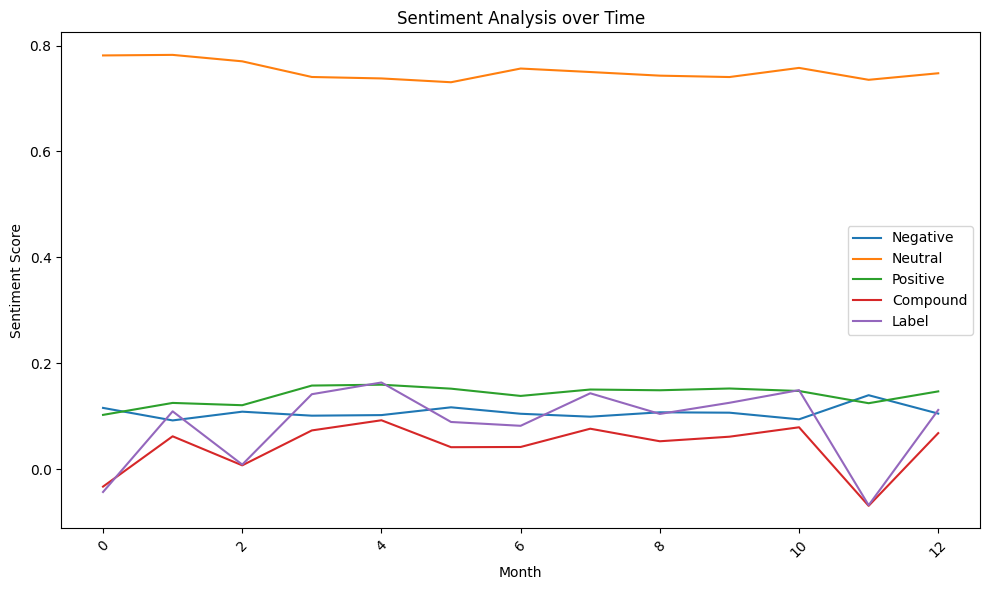

In [81]:
plt.figure(figsize=(10, 6))

plt.plot(t_avg_sentiments['Month'], t_avg_sentiments['neg'], label='Negative')
plt.plot(t_avg_sentiments['Month'], t_avg_sentiments['neu'], label='Neutral')
plt.plot(t_avg_sentiments['Month'], t_avg_sentiments['pos'], label='Positive')
plt.plot(t_avg_sentiments['Month'], t_avg_sentiments['compound'], label='Compound')
plt.plot(t_avg_sentiments['Month'], t_avg_sentiments['label'], label='Label')

plt.xlabel('Month')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Normalizing

In [82]:
t_headlines_polarity['Month'].value_counts()

Month
3     165990
4      49791
9      42738
11     39244
10     38986
5      35593
8      30926
6      29835
12     27151
7      26560
1       1124
2       1122
0        397
Name: count, dtype: int64

In [83]:
t_month_counts = t_headlines_polarity['Month'].value_counts()

t_normalized_counts = (t_month_counts - t_month_counts.min()) / (t_month_counts.max() - t_month_counts.min())

t_sorted_normalized_counts = t_normalized_counts.sort_index()

t_sorted_normalized_counts

Month
0     0.000000
1     0.004390
2     0.004378
3     1.000000
4     0.298286
5     0.212545
6     0.177773
7     0.157996
8     0.184362
9     0.255693
10    0.233035
11    0.234593
12    0.161565
Name: count, dtype: float64

In [84]:
t_normalized_avg_sentiments = t_avg_sentiments.copy()
t_normalized_avg_sentiments.iloc[:, 1:] = t_normalized_avg_sentiments.iloc[:, 1:].multiply(t_sorted_normalized_counts, axis=0)

t_normalized_avg_sentiments

,Month,neg,neu,pos,compound,label
0,0,0.000000,0.000000,0.000000,-0.000000,-0.000000
1,1,0.000405,0.003435,0.000550,0.000274,0.000480
2,2,0.000476,0.003372,0.000530,0.000033,0.000039
3,3,0.101269,0.740617,0.158113,0.073424,0.141798
4,4,0.030534,0.220102,0.047650,0.027623,0.048891
5,5,0.024879,0.155307,0.032360,0.008877,0.018995
6,6,0.018644,0.134500,0.024630,0.007499,0.014604
7,7,0.015698,0.118497,0.023801,0.012113,0.022682
8,8,0.019842,0.137007,0.027513,0.009765,0.019279
9,9,0.027336,0.189347,0.039011,0.015745,0.032116


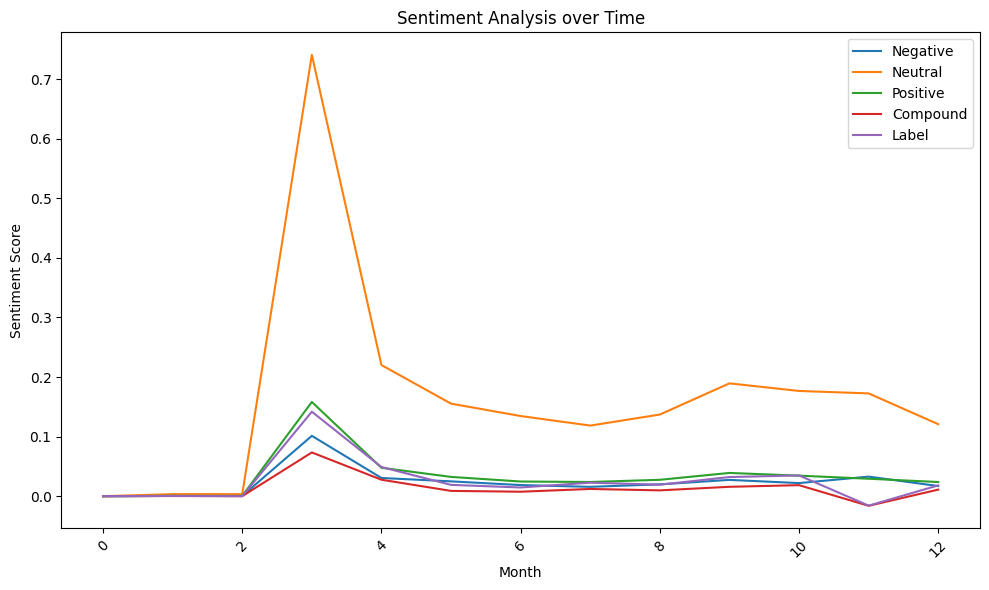

In [85]:
plt.figure(figsize=(10, 6))

plt.plot(t_normalized_avg_sentiments['Month'], t_normalized_avg_sentiments['neg'], label='Negative')
plt.plot(t_normalized_avg_sentiments['Month'], t_normalized_avg_sentiments['neu'], label='Neutral')
plt.plot(t_normalized_avg_sentiments['Month'], t_normalized_avg_sentiments['pos'], label='Positive')
plt.plot(t_normalized_avg_sentiments['Month'], t_normalized_avg_sentiments['compound'], label='Compound')
plt.plot(t_normalized_avg_sentiments['Month'], t_normalized_avg_sentiments['label'], label='Label')

plt.xlabel('Month')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Keywords

In [47]:
news_articles_df.head()

,Date,Title,Author,Publication Date,Article Text,Link,Source URL,Month,combined_text,tokens,lems,keywords
0,20201101,Punjab farm protests: Railways incur loss to t...,Business Standard,2020-11-04,The loss suffered by the Railways due to the a...,https://www.business-standard.com/article/indi...,https://www.business-standard.com,0,punjab farm protests railways incur loss to th...,"[punjab, farm, protests, railways, incur, loss...",punjab farm protest railway incur loss tune r ...,"[punjab, farm, protests, railways, incur, loss..."
1,20201101,Look beyond Punjab and Haryana,"Cdata, Var Template_Content, Sso_Login_Box, Xw...",2020-11-04,Written by Arindam Gupta\n\nThree Congress-rul...,https://indianexpress.com/article/opinion/farm...,https://indianexpress.com,0,look beyond punjab and haryana written by arin...,"[look, beyond, punjab, haryana, written, arind...",look beyond punjab haryana written arindam gup...,"[look, beyond, punjab, haryana, written, arind..."
2,20201101,"Explained: The Railways network in Punjab, and...","Avishek G Dastidar, Cdata, Var Template_Conten...",2020-11-10,The ongoing protests by farmers have brought a...,https://indianexpress.com/article/explained/th...,https://indianexpress.com,0,explained the railways network in punjab and h...,"[explained, railways, network, punjab, impacte...",explained railway network punjab impacted ongo...,"[explained, railways, network, punjab, impacte..."
3,20201101,"‘Farm protests eating into economy, will harm ...","Raakhi Jagga, Cdata, Var Template_Content, Sso...",2020-11-12,Disgruntled notes of protest have finally star...,https://indianexpress.com/article/india/farm-p...,https://indianexpress.com,0,farm protests eating into economy will harm pu...,"[farm, protests, eating, economy, harm, punjab...",farm protest eating economy harm punjab centre...,"[farm, protests, eating, economy, harm, punjab..."
4,20201101,‘Modi’s Rockefeller’: Gautam Adani and the con...,"Stephanie Findlay, Hudson Lockett",2020-11-13,Print this page\n\nWhen the Indian government ...,https://www.ft.com/content/474706d6-1243-4f1e-...,https://www.ft.com,0,modi s rockefeller gautam adani and the concen...,"[modi, rockefeller, gautam, adani, concentrati...",modi rockefeller gautam adani concentration po...,"[modi, rockefeller, gautam, adani, concentrati..."


In [92]:
final_twitter_df.head()

,renderedContent,Month,tokens,lems,keywords
0,yesterday in a public meeting telanganacmo all...,0,"[yesterday, public, meeting, telanganacmo, all...",yesterday public meeting telanganacmo alleged ...,"[yesterday, public, meeting, telanganacmo, all..."
1,has this been reported on msm or are they igno...,0,"[reported, msm, ignoring, agriculturebill, sav...",reported msm ignoring agriculturebill saveours...,"[reported, msm, ignoring, agriculturebill, sav..."
2,such a shame i wish pmoindia as well as cmodel...,0,"[shame, wish, pmoindia, well, cmodelhi, take, ...",shame wish pmoindia well cmodelhi take note tw...,"[shame, wish, pmoindia, well, cmodelhi, take, ..."
3,whitehouse realdonaldtrump forty cents of ever...,0,"[whitehouse, realdonaldtrump, forty, cents, ev...",whitehouse realdonaldtrump forty cent every do...,"[whitehouse, realdonaldtrump, forty, cents, ev..."
4,other side of apmc repeal bihar farmers want m...,0,"[side, apmc, repeal, bihar, farmers, want, man...",side apmc repeal bihar farmer want mandis like...,"[side, apmc, repeal, bihar, farmers, want, man..."


In [113]:
from collections import Counter
def top_30_keywords(df):
    # Concatenate all keywords lists into a single list
    all_keywords = [keyword for sublist in df['keywords'] for keyword in sublist]
    
    # Count the frequency of each keyword
    keyword_counts = Counter(all_keywords)
    
    # Extract the top 30 most common keywords
    top_30 = keyword_counts.most_common(30)
    
    return top_30

In [154]:
stopwords_additional = [
    "said", "also", "even", "us", "one", "two", "three", "first", "new", "made", "make",
    "come", "like", "well", "would", "however", "since", "around", "back", "way", "many",
    "several", "including", "last", "today", "read", "told", "held", "take", "talks", "part", "across", "taken", "added", "among", "going", "asked", "seen"
]

# Keywords with similar meanings can be grouped (example shown below)
similar_keywords = {
    "farmers": ["farmer", "kisan"],
    "protest": ["protests", "protesting", "protesters", "agitation", "movement"],
    "laws": ["law"],
    "government": ["centre", "central", "government", "state", "states", "national", "union", "unions"],
    "india": ["indian"],
    "support": ["support"],
    "delhi": ["capital"],
    "punjab": ["punjab"],
    "singh": ["singh"],
    "minister": ["minister", "chief", "pm", "prime", "narendra", "modi"],
    "haryana": ["haryana"],
    "border": ["border", "borders", "singhu"],
    "police": ["police"],
    "people": ["people", "thousands"],
    "agriculture": ["farm", "agriculture", "agricultural", "produce"],
    "price": ["price", "msp"],
    "ongoing": ["ongoing", "days", "months", "year"],
    "talks": ["talks"],
    "november": ["november", "january"],
    "leader": ["leader", "leaders", "president"],
    "issue": ["issue", "problem"],
    "social": ["social", "media"],
    "violence": ["violence"],
    "repeal": ["repeal"],
    "committee": ["committee"],
    "parliament": ["parliament"],
    "right": ["right"],
    "uttar": ["uttar", "pradesh"],
}


In [122]:
def clean_and_replace_keywords(keyword_list, stopwords, replacements):
    # Remove stopwords
    cleaned_list = [word for word in keyword_list if word not in stopwords]
    
    # Replace using similar_keywords mapping
    # For each word, if it's a key in replacements, use the key,
    # otherwise, if it's a value in any of the keys, replace it with the key
    replaced_list = []
    for word in cleaned_list:
        replaced = False
        for key, values in replacements.items():
            if word == key or word in values:
                replaced_list.append(key)
                replaced = True
                break
        if not replaced:
            replaced_list.append(word)
    
    return replaced_list

In [155]:
news_articles_df['keywords'] = news_articles_df['keywords'].apply(
    lambda x: clean_and_replace_keywords(x, stopwords_additional, similar_keywords)
)

In [131]:
irrelevant_keywords = [
    "com", "co", "https", "amp", "st", "us", "sta", "stat", "statu", "u", "also", "one", "like",
    "today", "please", "still", "time", "good", "let", "get", "know", "even", "stop", "take", "make",
    "see", "never", "much", "every", "want", "go", "always", "cannot", "many", "would", "going", "back",
    "thanks", "thank", "let", "ji", "must"
]

# Keywords with similar meanings or related context
similar_keywords = {
    "farmers_protest": ["farmersprotest", "protest", "protesting", "kisanektamorcha", "tractortwitr", "istandwithfarmers"],
    "farm_related": ["farmers", "farmer", "farm", "farmlaws"],
    "support": ["support", "supporting", "stand", "istandwithfarmers"],
    "laws_government": ["laws", "government", "govt", "repeal", "narendramodi", "pmoindia", "pm", "modi"],
    "india": ["india", "indian", "country", "nation"],
    "public_figures": ["rihanna", "gretathunberg", "narendramodi"],
    "political_parties": ["bjp"],
    "social_issues": ["rights", "humanrights", "justice", "democracy", "fight", "voice", "power", "win"],
    "msp": ["msp"],
    "delhi": ["delhi"],
    "media_social": ["twitter", "tweet", "retweet", "media", "news", "hashtag"],
    "agriculture_food": ["food"],
    "police": ["police"],
    "day_time": ["day", "today", "time", "months"],
    "action": ["keep", "need", "shame", "speak"],
    "misc": ["world", "human", "everyone", "new", "status"]
}

In [132]:
final_twitter_df['keywords'] = final_twitter_df['keywords'].apply(
    lambda x: clean_and_replace_keywords(x, irrelevant_keywords, similar_keywords)
)

In [133]:
twitter_top_keywords = top_30_keywords(final_twitter_df)
for keyword, count in twitter_top_keywords:
        print(f"{keyword}: {count}")

farmers_protest: 557781
farm_related: 203398
media_social: 191484
laws_government: 152884
india: 104650
social_issues: 80831
support: 65485
misc: 47670
action: 43733
day_time: 31639
political_parties: 29513
public_figures: 28819
people: 27745
delhi: 14531
msp: 14305
right: 14181
agriculture_food: 12337
police: 11012
punjab: 9485
save: 7185
fighting: 6979
standwithfarmers: 6727
singh: 6500
black: 6462
life: 6431
peaceful: 6383
united: 6374
law: 6368
haryana: 6333
lives: 6296


In [156]:
news_top_keywords = top_30_keywords(news_articles_df)
for keyword, count in news_top_keywords:
        print(f"{keyword}: {count}")

government: 1848
protest: 1719
farmers: 1140
minister: 1013
agriculture: 960
ongoing: 694
india: 635
delhi: 612
laws: 598
border: 598
leader: 519
people: 399
price: 328
november: 295
support: 289
uttar: 288
punjab: 287
singh: 284
social: 284
haryana: 264
police: 241
day: 232
advertisement: 229
country: 228
time: 189
issue: 182
minimum: 150
violence: 146
repeal: 145
committee: 140


In [159]:
news_top_keywords

['government',
 'protest',
 'farmers',
 'minister',
 'agriculture',
 'ongoing',
 'india',
 'delhi',
 'laws',
 'border',
 'leader',
 'people',
 'price',
 'november',
 'support',
 'uttar',
 'punjab',
 'singh',
 'social',
 'haryana',
 'police',
 'day',
 'advertisement',
 'country',
 'time',
 'issue',
 'minimum',
 'violence',
 'repeal',
 'committee']

In [ ]:
twitter_top_keywords = [keyword[0] for keyword in twitter_top_keywords]

In [158]:
news_top_keywords = [keyword[0] for keyword in news_top_keywords]

Word Vectorization

In [137]:
from sklearn.feature_extraction.text import CountVectorizer

In [160]:
vectorizer = CountVectorizer(vocabulary=news_top_keywords, lowercase=False)
news_vectors = vectorizer.fit_transform([' '.join(article) for article in news_articles_df['keywords']])
news_articles_df['vector'] = [list(vector.toarray()[0]) for vector in news_vectors]

In [148]:
vectorizer1 = CountVectorizer(vocabulary=twitter_top_keywords, lowercase=False)
tweets_vectors = vectorizer1.fit_transform([' '.join(article) for article in final_twitter_df['keywords']])
final_twitter_df['vector'] = [list(vector.toarray()[0]) for vector in tweets_vectors]

In [149]:
final_twitter_df.head()

,renderedContent,Month,tokens,lems,keywords,vector
0,yesterday in a public meeting telanganacmo all...,0,"[yesterday, public, meeting, telanganacmo, all...",yesterday public meeting telanganacmo alleged ...,"[yesterday, public, meeting, telanganacmo, all...","[2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,has this been reported on msm or are they igno...,0,"[reported, msm, ignoring, agriculturebill, sav...",reported msm ignoring agriculturebill saveours...,"[reported, msm, ignoring, agriculturebill, sav...","[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,such a shame i wish pmoindia as well as cmodel...,0,"[shame, wish, pmoindia, well, cmodelhi, take, ...",shame wish pmoindia well cmodelhi take note tw...,"[action, wish, laws_government, cmodelhi, note...","[1, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
3,whitehouse realdonaldtrump forty cents of ever...,0,"[whitehouse, realdonaldtrump, forty, cents, ev...",whitehouse realdonaldtrump forty cent every do...,"[whitehouse, realdonaldtrump, forty, cents, do...","[1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,other side of apmc repeal bihar farmers want m...,0,"[side, apmc, repeal, bihar, farmers, want, man...",side apmc repeal bihar farmer want mandis like...,"[side, apmc, laws_government, bihar, farm_rela...","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [161]:
news_vector_df = news_articles_df.groupby('Month')['vector'].apply(lambda x: np.mean(x.tolist(), axis=0)).reset_index()
news_vector_df

,Month,vector
0,0,"[4.315789473684211, 3.1228070175438596, 2.1929..."
1,1,"[3.25, 3.02, 1.88, 2.16, 2.22, 1.04, 1.42, 1.0..."
2,2,"[3.288659793814433, 3.0309278350515463, 2.0309..."
3,3,"[2.3608247422680413, 2.9587628865979383, 1.649..."
4,4,"[2.883720930232558, 2.8372093023255816, 1.9302..."
5,5,"[2.7, 1.9, 1.7, 0.9, 1.6, 1.3, 0.7, 0.9, 0.5, ..."
6,6,"[2.3, 2.4, 2.2, 1.1, 1.0, 1.4, 0.2, 0.9, 0.9, ..."
7,7,"[3.8333333333333335, 3.0833333333333335, 2.166..."
8,8,"[2.7333333333333334, 2.7333333333333334, 2.066..."
9,9,"[4.0, 3.8, 2.2, 1.6, 0.9, 1.4, 0.6, 0.7, 1.0, ..."


In [153]:
final_twitter_df = final_twitter_df.groupby('Month')['vector'].apply(lambda x: np.mean(x.tolist(), axis=0)).reset_index()
final_twitter_df

,Month,vector
0,0,"[1.216624685138539, 0.690176322418136, 0.35516..."
1,1,"[1.2402135231316727, 0.5480427046263345, 0.362..."
2,2,"[1.1942959001782532, 0.5864527629233511, 0.334..."
3,3,"[1.1469847581179589, 0.3240677149225857, 0.438..."
4,4,"[1.133357434074431, 0.38209716615452594, 0.401..."
5,5,"[1.120276458854269, 0.3433259348748349, 0.3869..."
6,6,"[1.1395005865594101, 0.37372213842802077, 0.44..."
7,7,"[1.1490210843373494, 0.4430346385542169, 0.424..."
8,8,"[1.1542391515229904, 0.49223953954601307, 0.34..."
9,9,"[1.123988020029014, 0.5008423417099537, 0.3480..."


In [162]:
import spacy

In [ ]:
!python -m spacy download en_core_web_md
nlp = spacy.load('en_core_web_md')

In [167]:
news_keyword_vectors = {keyword: nlp(keyword).vector for keyword in news_top_keywords}

In [182]:
n_word_vectors_matrix = np.array(list(news_keyword_vectors.values()))
average_vectors = np.array(news_vector_df['vector'].tolist())
merged_vectors_matrix = np.dot(average_vectors, n_word_vectors_matrix)

merged_vectors_matrix.shape

(13, 300)

In [188]:
merged_vectors_matrix

array([[-16.30806656,  28.11941317, -62.81689012, ..., -80.40276599,
        -32.34848812,  95.98513248],
       [-12.87355621,  23.27992358, -61.81518788, ..., -71.20535367,
        -32.63321729,  84.88497644],
       [-16.87567403,  24.32357952, -60.11356292, ..., -73.44541413,
        -26.06631757,  80.87358029],
       ...,
       [-13.24089683,  20.93525198, -62.07797861, ..., -65.63377464,
        -24.62260401,  77.3869174 ],
       [-13.60926437,  24.01724821, -53.98012681, ..., -55.59431615,
        -26.88105101,  74.03520401],
       [-13.99429591,  17.79539079, -59.10068807, ..., -67.45946586,
        -23.453675  ,  80.37490456]])

In [189]:
news_vector_df['vector'] = merged_vectors_matrix.tolist()

In [192]:
twitter_top_keywords = ['farmers protest',
 'farm related',
 'media social',
 'laws government',
 'india',
 'social issues',
 'support',
 'misc',
 'action',
 'day time',
 'political parties',
 'public figures',
 'people',
 'delhi',
 'msp',
 'right',
 'agriculture food',
 'police',
 'punjab',
 'save',
 'fighting',
 'stand with farmers',
 'singh',
 'black',
 'life',
 'peaceful',
 'united',
 'law',
 'haryana',
 'lives']

In [193]:
twitter_keyword_vectors = {keyword: nlp(keyword).vector for keyword in twitter_top_keywords}

In [194]:
t_word_vectors_matrix = np.array(list(twitter_keyword_vectors.values()))
average_vectors = np.array(final_twitter_df['vector'].tolist())
t_merged_vectors_matrix = np.dot(average_vectors, t_word_vectors_matrix)

t_merged_vectors_matrix.shape

(13, 300)

In [197]:
final_twitter_df['vector'] = t_merged_vectors_matrix.tolist()

In [198]:
final_twitter_df

,Month,vector
0,0,"[-3.695578402175711, 1.714994244146107, -9.990..."
1,1,"[-3.2288149877640273, 0.8321638027225949, -10...."
2,2,"[-3.2816177479086077, 0.8531855085130894, -10...."
3,3,"[-2.6675351578588975, 1.1212582466199112, -11...."
4,4,"[-2.6623804938937785, 1.2472789605785384, -11...."
5,5,"[-2.502329942013244, 1.1462093440668915, -11.0..."
6,6,"[-2.537381461912491, 1.1735177808078028, -11.0..."
7,7,"[-2.400371354725212, 1.2209917932350458, -11.4..."
8,8,"[-2.695184728529054, 0.7765962077375913, -11.5..."
9,9,"[-2.6861012251159884, 0.5379784390538815, -11...."


In [190]:
news_vector_df

,Month,vector
0,0,"[-16.308066555151814, 28.11941317481953, -62.8..."
1,1,"[-12.873556208536032, 23.279923578985034, -61...."
2,2,"[-16.87567403159805, 24.323579517068325, -60.1..."
3,3,"[-8.668482423135911, 19.411165467357822, -54.6..."
4,4,"[-13.83963290809892, 28.32245937137064, -56.39..."
5,5,"[-8.399557297676804, 21.29775135181844, -42.44..."
6,6,"[-12.75017853155732, 25.022043243423106, -51.5..."
7,7,"[-14.416395797704656, 24.550376354406275, -64...."
8,8,"[-13.815915083885194, 21.547885951151446, -48...."
9,9,"[-17.112164272367956, 23.74580026268959, -64.3..."


In [199]:
from sklearn.metrics.pairwise import cosine_similarity

In [200]:
combined_df = pd.DataFrame()

combined_df['Month'] = news_vector_df['Month']
combined_df['news_vector'] = news_vector_df['vector']
combined_df['twitter_vector'] = final_twitter_df['vector']

cosine_similarities = []
for news_vec, twitter_vec in zip(combined_df['news_vector'], combined_df['twitter_vector']):
    similarity = cosine_similarity([news_vec], [twitter_vec])[0][0]
    cosine_similarities.append(similarity)

combined_df['cosine_similarity'] = cosine_similarities

combined_df

,Month,news_vector,twitter_vector,cosine_similarity
0,0,"[-16.308066555151814, 28.11941317481953, -62.8...","[-3.695578402175711, 1.714994244146107, -9.990...",0.936041
1,1,"[-12.873556208536032, 23.279923578985034, -61....","[-3.2288149877640273, 0.8321638027225949, -10....",0.938085
2,2,"[-16.87567403159805, 24.323579517068325, -60.1...","[-3.2816177479086077, 0.8531855085130894, -10....",0.937181
3,3,"[-8.668482423135911, 19.411165467357822, -54.6...","[-2.6675351578588975, 1.1212582466199112, -11....",0.952351
4,4,"[-13.83963290809892, 28.32245937137064, -56.39...","[-2.6623804938937785, 1.2472789605785384, -11....",0.934700
5,5,"[-8.399557297676804, 21.29775135181844, -42.44...","[-2.502329942013244, 1.1462093440668915, -11.0...",0.930165
6,6,"[-12.75017853155732, 25.022043243423106, -51.5...","[-2.537381461912491, 1.1735177808078028, -11.0...",0.936912
7,7,"[-14.416395797704656, 24.550376354406275, -64....","[-2.400371354725212, 1.2209917932350458, -11.4...",0.928356
8,8,"[-13.815915083885194, 21.547885951151446, -48....","[-2.695184728529054, 0.7765962077375913, -11.5...",0.939344
9,9,"[-17.112164272367956, 23.74580026268959, -64.3...","[-2.6861012251159884, 0.5379784390538815, -11....",0.925178


In [202]:
final_twitter_df.to_csv('final_twitter.csv', index=False)
t_avg_sentiments.to_csv('t_avg_sentiments.csv', index=False)
t_headlines_polarity.to_csv('t_headlines_polarity.csv', index=False)
news_articles_df.to_csv('final_news_articles.csv', index=False)
avg_sentiments.to_csv('n_avg_sentiments.csv', index=False)
headlines_polarity.to_csv('n_headlines_polarity.csv', index=False)

In [201]:
combined_df.to_csv('cosine_combined_df.csv', index=False)